# Importing the Libraries

In [1]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Removing the dataset and cloned yolo files if they exist already

In [2]:
try:
    shutil.rmtree("/kaggle/working/dataset")
    shutil.rmtree("/kaggle/working/yolov5")
except:
    pass

# Cloning YoloV5 git Repo

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14962, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 14962 (delta 13), reused 13 (delta 5), pack-reused 14936
Receiving objects: 100% (14962/14962), 14.00 MiB | 26.36 MiB/s, done.
Resolving deltas: 100% (10280/10280), done.


In [4]:
%cd yolov5/

/kaggle/working/yolov5


# Installing YoloV5 requirements files

In [5]:
!pip install -r requirements.txt

# Preparing the traffic signs dataset for training and validation

In [6]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"
crs_path = "/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  592
validation images are :  148


In [7]:
len(imgs)

741

In [8]:
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00517.jpg'] ['00517.txt']


# Downloading dataset.yaml file from google cloud for the dataset

In [9]:
!pip install googledrivedownloader

In [10]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1KtlDXpLCfqoklUTdrnVASNbxL_AK9qnx',
                                    dest_path='/kaggle/working/dataset/dataset.yaml')

In [11]:
with open(r'/kaggle/working/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /kaggle/working/dataset/images/train\n', 'val: /kaggle/working/dataset/images/val\n', '\n', 'nc: 4\n', "names: ['speed limit','yield','mandatory','other']"]


# Training the YoloV5 model on custom traffic signs dataset

In [12]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 30 --data /kaggle/working/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

W&B disabled.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gam

# Making Predictions on Validation data

In [13]:
!python detect.py --source /kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00023.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00023.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00023.jpg: 384x640 1 speed limit, 2 yields, 12.1ms
Speed: 0.5ms pre-process, 12.1ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


# Displaying results

In [14]:
!ls ./runs/detect/exp

00023.jpg


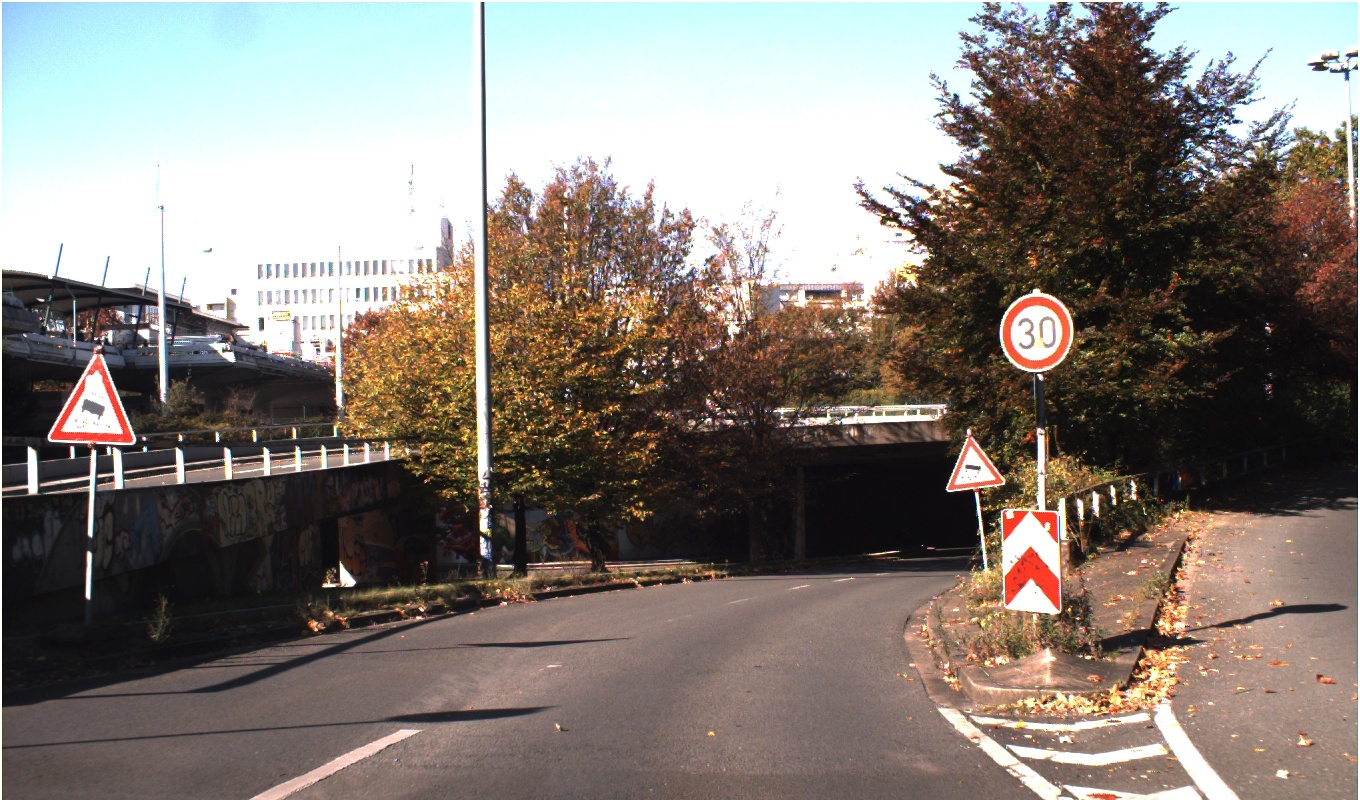

In [15]:
Image(filename='/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00023.jpg', width=416)

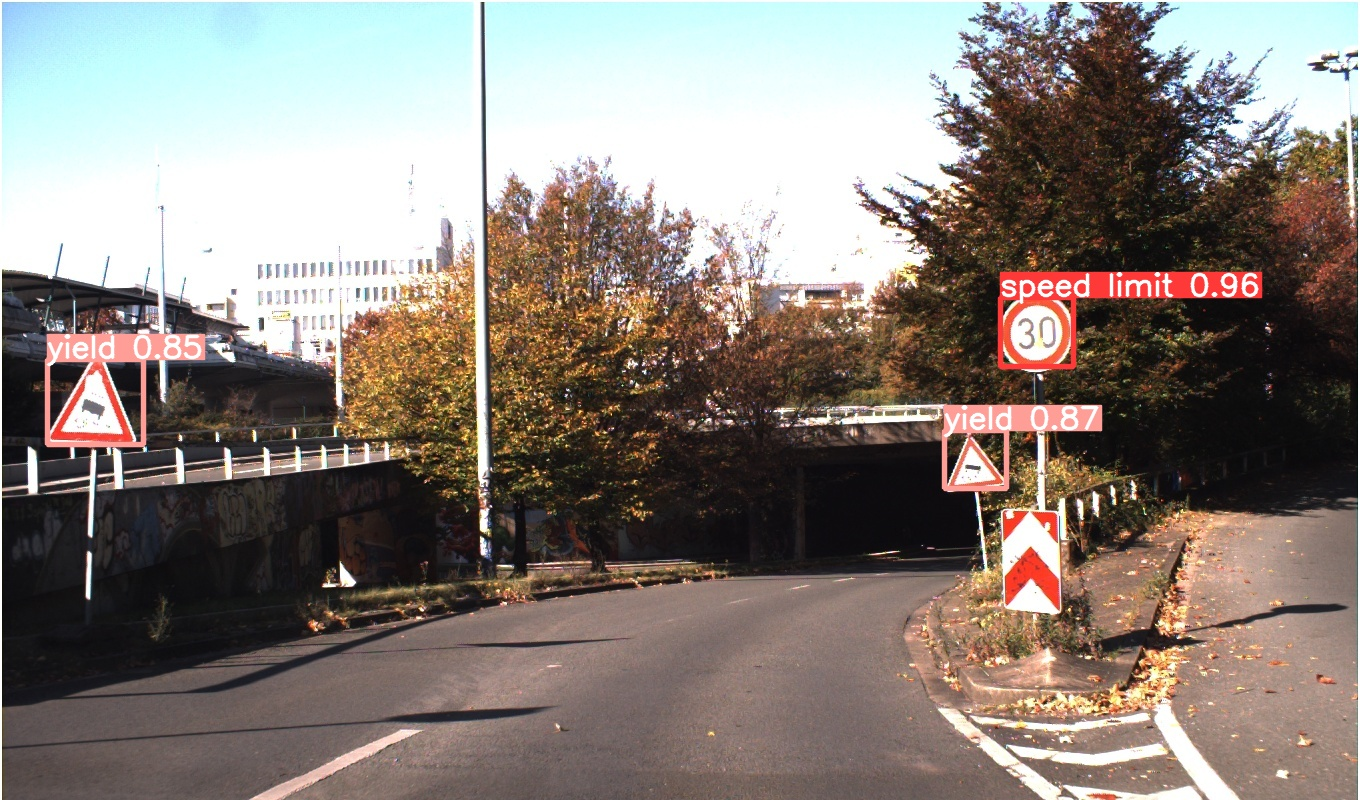

In [16]:
Image(filename='./runs/detect/exp/00023.jpg', width=416)

In [17]:
!ls ../

__notebook__.ipynb  dataset  yolov5


# prediction on internet image


In [18]:
!python detect.py --source /kaggle/input/80-kilomet/22022-img5.jpeg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/80-kilomet/22022-img5.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/80-kilomet/22022-img5.jpeg: 480x640 2 speed limits, 1 other, 12.3ms
Speed: 0.6ms pre-process, 12.3ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


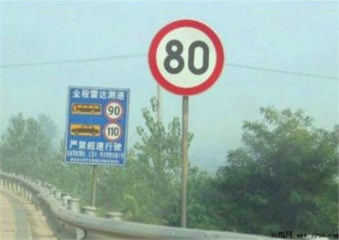

In [19]:
Image(filename='/kaggle/input/80-kilomet/22022-img5.jpeg', width=416)

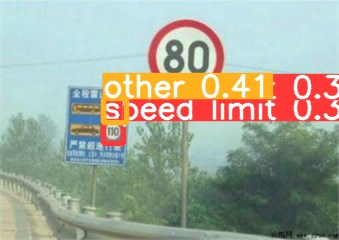

In [20]:
Image(filename='./runs/detect/exp2/22022-img5.jpeg', width=416)

In [21]:
!python detect.py --source /kaggle/input/signs-yolo/vietnam.jpeg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/signs-yolo/vietnam.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-63-gcdd804d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/signs-yolo/vietnam.jpeg: 384x640 1 other, 11.4ms
Speed: 0.4ms pre-process, 11.4ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


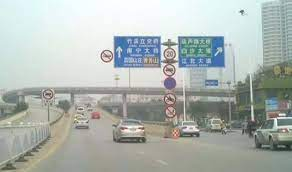

In [22]:
Image(filename='/kaggle/input/signs-yolo/vietnam.jpeg', width=416)

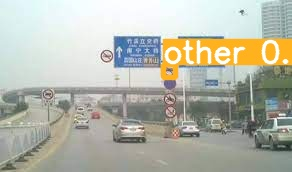

In [23]:
Image(filename='./runs/detect/exp3/vietnam.jpeg', width=416)